In [1]:
# Exploratory Data Analysis (EDA)
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

file_path = r"D:\CodeTest\Jupy\2025 Allianz Datathon Dataset_2025est.xlsx"
visitation_df = pd.read_excel(file_path, sheet_name="Visitation Data")
climate_df = pd.read_excel(file_path, sheet_name="Climate Data")

print("Data reading completed")

# data information
print("\n--- Visitation Data Info ---")
print(visitation_df.info())
print("\n--- Climate Data Info ---")
print(climate_df.info())

Data reading completed

--- Visitation Data Info ---
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 177 entries, 0 to 176
Data columns (total 11 columns):
 #   Column          Non-Null Count  Dtype
---  ------          --------------  -----
 0   Year            177 non-null    int64
 1   Week            177 non-null    int64
 2   Mt. Baw Baw     177 non-null    int64
 3   Mt. Stirling    177 non-null    int64
 4   Mt. Hotham      177 non-null    int64
 5   Falls Creek     177 non-null    int64
 6   Mt. Buller      177 non-null    int64
 7   Selwyn          177 non-null    int64
 8   Thredbo         177 non-null    int64
 9   Perisher        177 non-null    int64
 10  Charlotte Pass  177 non-null    int64
dtypes: int64(11)
memory usage: 15.3 KB
None

--- Climate Data Info ---
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39813 entries, 0 to 39812
Data columns (total 7 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                         

In [2]:
# Missing value check
print("\n--- Missing Values (Visitation) ---")
print(visitation_df.isna().sum())
print("\n--- Missing Values (Climate) ---")
print(climate_df.isna().sum())
# Missing value ratio
missing_ratio = climate_df.isnull().mean() * 100
print("\nMissing value ratio（%）:\n", missing_ratio)


--- Missing Values (Visitation) ---
Year              0
Week              0
Mt. Baw Baw       0
Mt. Stirling      0
Mt. Hotham        0
Falls Creek       0
Mt. Buller        0
Selwyn            0
Thredbo           0
Perisher          0
Charlotte Pass    0
dtype: int64

--- Missing Values (Climate) ---
Bureau of Meteorology station number       0
Year                                       0
Month                                      0
Day                                        0
Maximum temperature (Degree C)          1538
Minimum temperature (Degree C)          1533
Rainfall amount (millimetres)           1956
dtype: int64

Missing value ratio（%）:
 Bureau of Meteorology station number    0.000000
Year                                    0.000000
Month                                   0.000000
Day                                     0.000000
Maximum temperature (Degree C)          3.863060
Minimum temperature (Degree C)          3.850501
Rainfall amount (millimetres)           4.912968

In [3]:
# ============ Outlier Detection ============
#Set upper and lower bounds: [Q1 - 1.5*IQR, Q3 + 1.5*IQR]
def detect_outliers_iqr(series, factor=1.5):
    q1 = series.quantile(0.25)
    q3 = series.quantile(0.75)
    iqr = q3 - q1
    lower = q1 - factor * iqr
    upper = q3 + factor * iqr
    outliers = series[(series < lower) | (series > upper)]
    return outliers

print("\n--- Outlier detection ---")
RESORT_COLS = [
    "Mt. Baw Baw","Mt. Stirling","Mt. Hotham","Falls Creek",
    "Mt. Buller","Selwyn","Thredbo","Perisher","Charlotte Pass"
]
climate_num_cols = [
    "Maximum temperature (Degree C)",
    "Minimum temperature (Degree C)",
    "Rainfall amount (millimetres)"
]
# Visitors: cannot be negative, extreme high values ​​should be paid attention to
for col in RESORT_COLS:
    outliers = detect_outliers_iqr(visitation_df[col])
    if len(outliers) > 0:
        print(f"{col}: {len(outliers)} Outliers, range =({outliers.min()}, {outliers.max()})")

# Climate data: Temperatures outside the acceptable range (-15°C to 40°C), or rainfall >= 250mm/day, are marked as abnormal.
for col in climate_num_cols:
    if "temperature" in col.lower():
        bad = climate_df[(climate_df[col] < -15) | (climate_df[col] > 40)]
    else:
        bad = climate_df[climate_df[col] >= 250]
    print(f"{col}: {len(bad)} extreme outliers")


--- Outlier detection ---
Mt. Stirling: 1 Outliers, range =(2528, 2528)
Maximum temperature (Degree C): 0 extreme outliers
Minimum temperature (Degree C): 0 extreme outliers
Rainfall amount (millimetres): 1 extreme outliers


In [4]:
outlier_rows = visitation_df[visitation_df["Mt. Stirling"] == 2528]
print(outlier_rows)

     Year  Week  Mt. Baw Baw  Mt. Stirling  Mt. Hotham  Falls Creek  \
173  2025     9         6829          2528       16277        21981   

     Mt. Buller  Selwyn  Thredbo  Perisher  Charlotte Pass  
173       30022    7181    39093     51461            2833  


Since the previous outlier range was a single point, after checking it separately, it was found that the customer flow of all resorts was during peak hours and was not determined to be an outlier.

In [5]:
# 3. Descriptive Statistics
print("\n--- Descriptive Statistics: Visitation ---")
print(visitation_df.describe())
print("\n--- Descriptive Statistics: Climate ---")
print(climate_df.describe())


--- Descriptive Statistics: Visitation ---
              Year        Week   Mt. Baw Baw  Mt. Stirling    Mt. Hotham  \
count   177.000000  177.000000    177.000000    177.000000    177.000000   
mean   2019.406780    7.898305   5363.118644    620.570621  19608.847458   
std       3.415133    4.295987   3891.153877    556.063740  12008.833356   
min    2014.000000    1.000000      0.000000      0.000000      0.000000   
25%    2016.000000    4.000000   1757.000000    103.000000   8368.000000   
50%    2019.000000    8.000000   5341.000000    498.000000  20295.000000   
75%    2022.000000   12.000000   8513.000000   1032.000000  30515.000000   
max    2025.000000   15.000000  18031.000000   2528.000000  44648.000000   

        Falls Creek    Mt. Buller        Selwyn       Thredbo      Perisher  \
count    177.000000    177.000000    177.000000    177.000000    177.000000   
mean   23515.299435  29097.242938   5544.248588  30070.774011  39706.350282   
std    13906.053154  17485.322183 

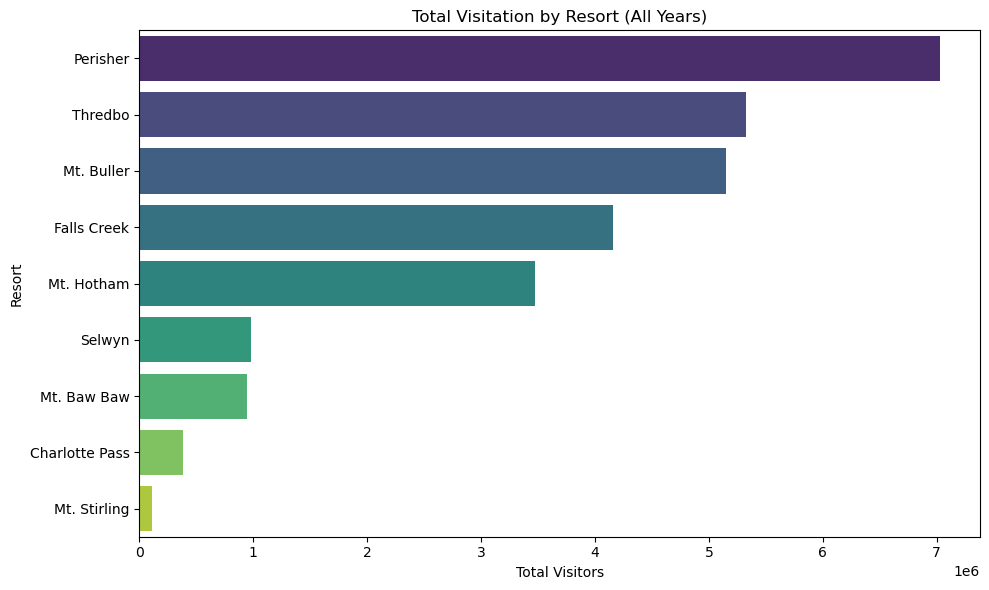

In [6]:
# (a) Comparison of total visitor numbers at different ski resorts
total_visitation = visitation_df.drop(columns=["Year", "Week"]).sum().sort_values(ascending=False)

plt.figure(figsize=(10,6))
sns.barplot(x=total_visitation.values, y=total_visitation.index, palette="viridis")
plt.title("Total Visitation by Resort (All Years)")
plt.xlabel("Total Visitors")
plt.ylabel("Resort")
plt.tight_layout()
plt.show()

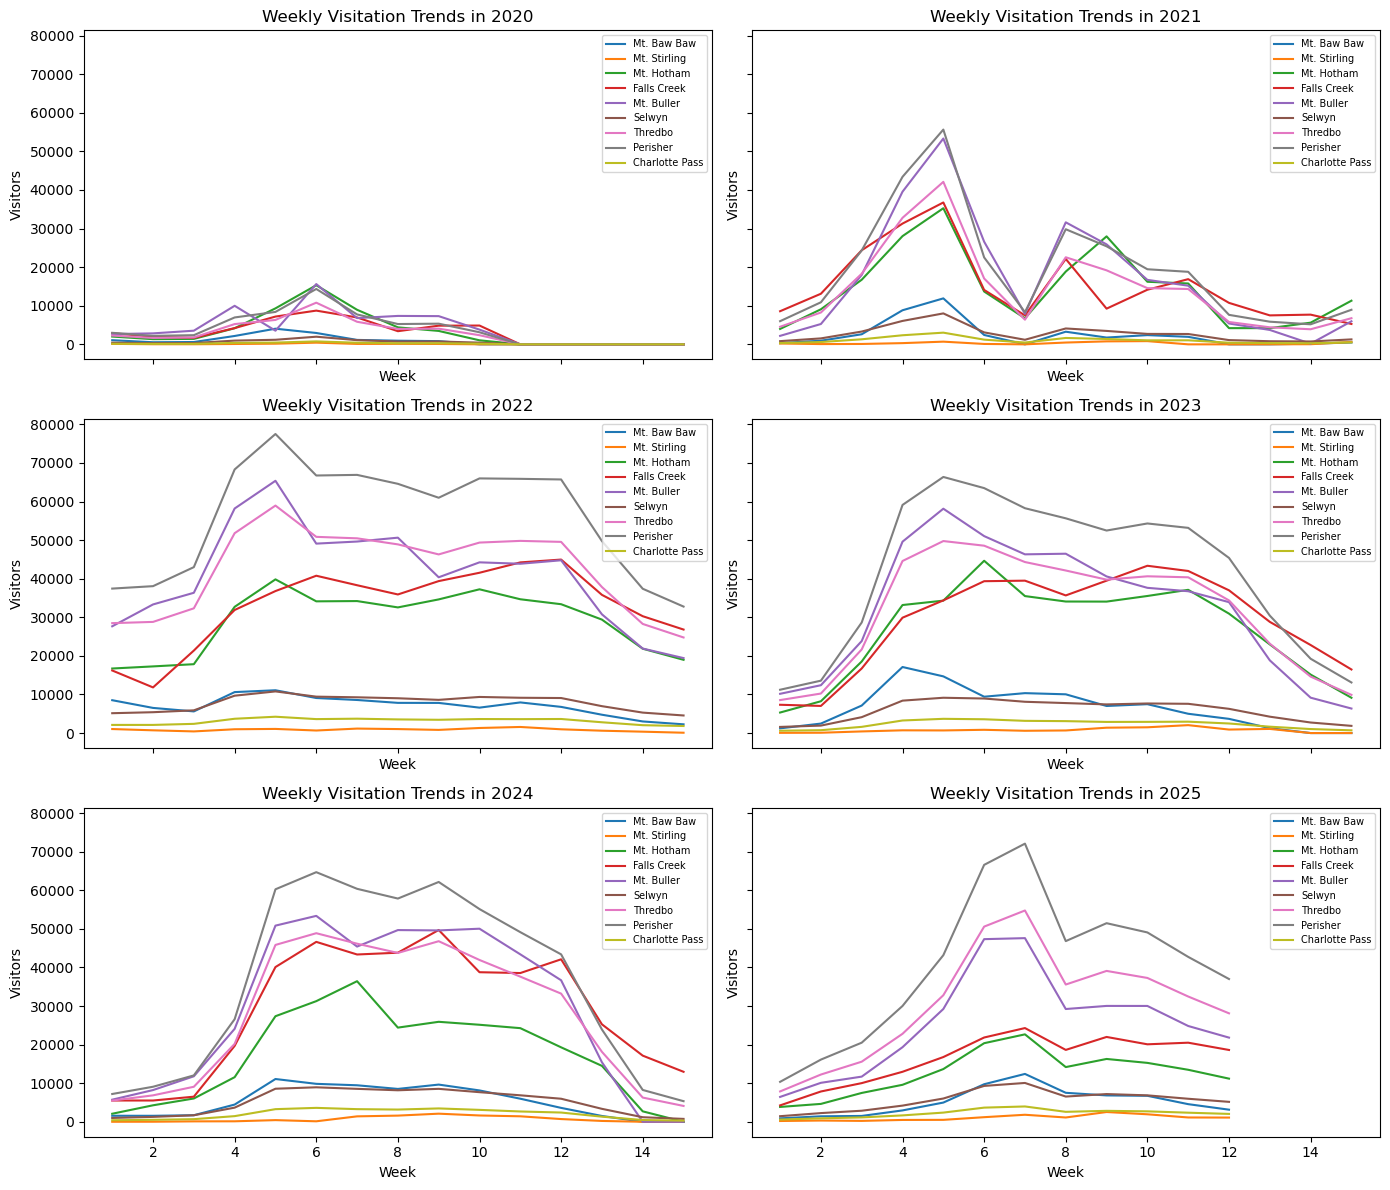

In [7]:
# Draw weekly trends for each resort from 2020-2025
years = range(2020, 2026)

# Create a 3-row 2-column subgraph
fig, axes = plt.subplots(3, 2, figsize=(14, 12), sharex=True, sharey=True)
axes = axes.flatten()  #Flattened for easy indexing

for i, year in enumerate(years):
    yearly_data = visitation_df[visitation_df["Year"] == year]
    
    for col in yearly_data.columns[2:]:
        axes[i].plot(yearly_data["Week"], yearly_data[col], label=col)
    
    axes[i].set_title(f"Weekly Visitation Trends in {year}")
    axes[i].set_xlabel("Week")
    axes[i].set_ylabel("Visitors")
    axes[i].legend(fontsize=7, loc="upper right")

plt.tight_layout()
plt.show()

D:\AppD\appopen\Anaconda\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
D:\AppD\appopen\Anaconda\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
D:\AppD\appopen\Anaconda\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


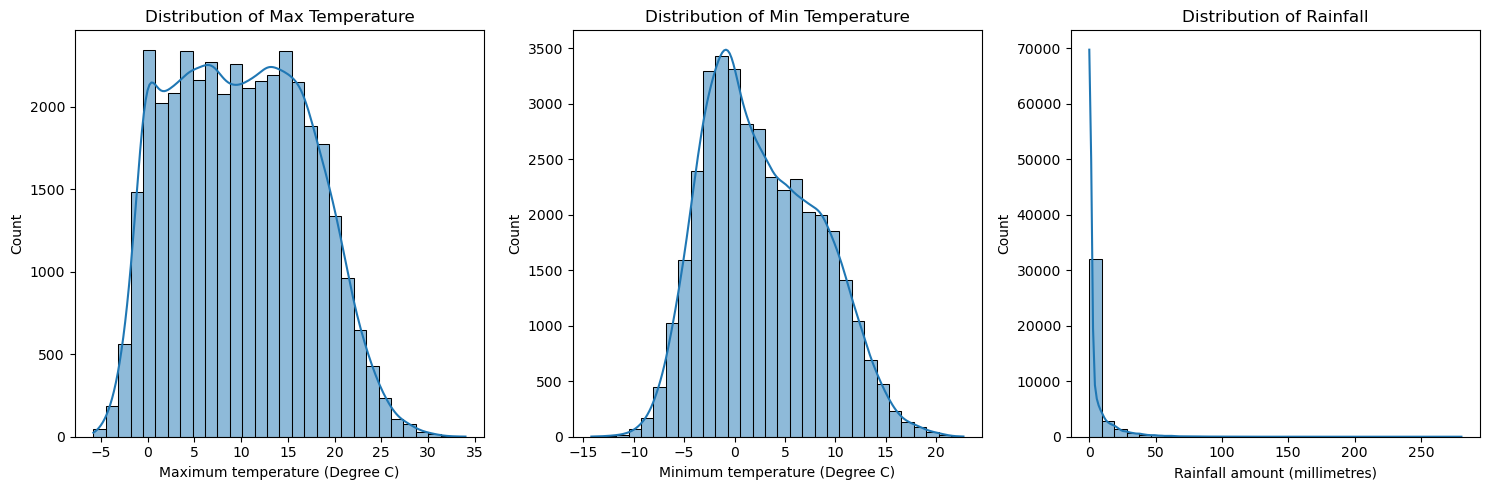

In [8]:
# (c) Distribution of climate data (temperature + rainfall)
fig, axes = plt.subplots(1, 3, figsize=(15,5))

cols = [
    ("Maximum temperature (Degree C)", "Distribution of Max Temperature"),
    ("Minimum temperature (Degree C)", "Distribution of Min Temperature"),
    ("Rainfall amount (millimetres)", "Distribution of Rainfall")
]
#kde: draw a kernel density estimation curve
for i, (col, title) in enumerate(cols):
    sns.histplot(climate_df[col], bins=30, ax=axes[i], kde=True)
    axes[i].set_title(title)

plt.tight_layout()
plt.show()

In [9]:
# Correlation analysis between climate and visitor volume
# Generate date and week
climate_df["Date"] = pd.to_datetime(climate_df[["Year","Month","Day"]])
climate_df["Week"] = climate_df["Date"].dt.isocalendar().week

# Aggregate climate data by week
weekly_climate = climate_df.groupby(["Year","Week"]).agg({
    "Maximum temperature (Degree C)": "mean",
    "Minimum temperature (Degree C)": "mean",
    "Rainfall amount (millimetres)": "sum"
}).reset_index()

# merge data
merged_df = pd.merge(visitation_df, weekly_climate, on=["Year","Week"], how="inner")

In [10]:
#Calculate total visitors
merged_df["Total Visitors"] = merged_df[RESORT_COLS].sum(axis=1)

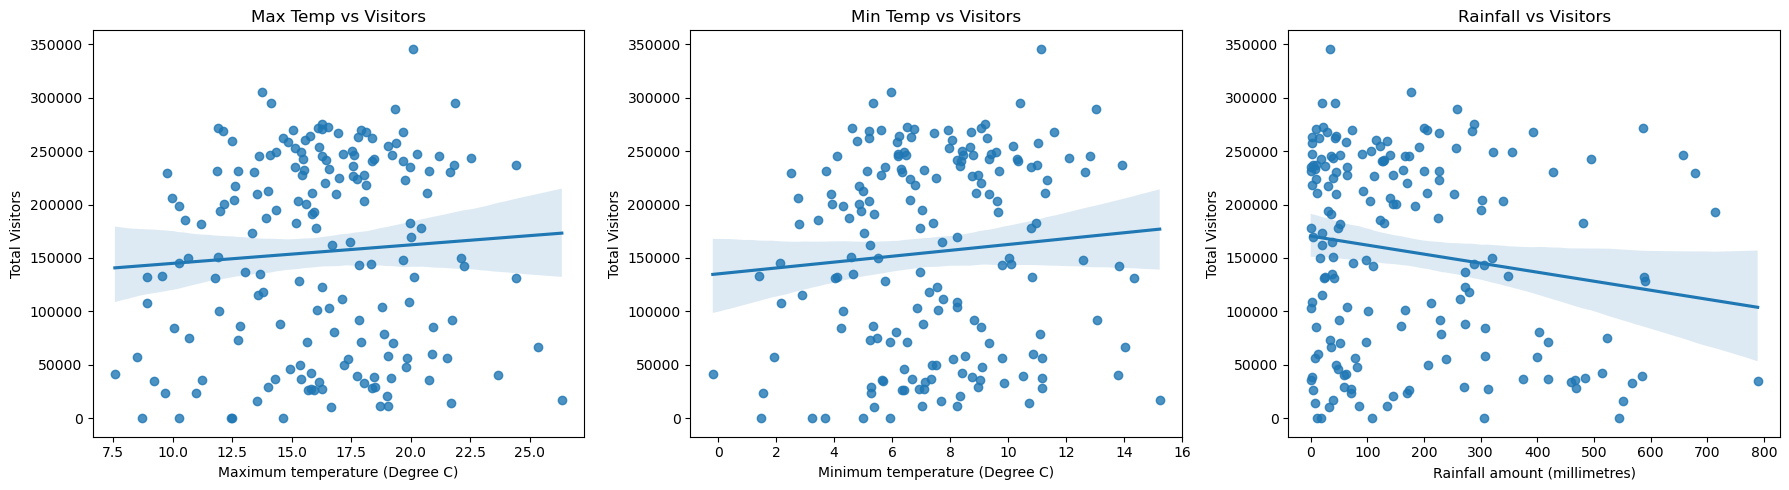

In [11]:
# Scatter plot + regression line
fig, axes = plt.subplots(1, 3, figsize=(18,5))

sns.regplot(data=merged_df, x="Maximum temperature (Degree C)", y="Total Visitors", ax=axes[0])
axes[0].set_title("Max Temp vs Visitors")

sns.regplot(data=merged_df, x="Minimum temperature (Degree C)", y="Total Visitors", ax=axes[1])
axes[1].set_title("Min Temp vs Visitors")

sns.regplot(data=merged_df, x="Rainfall amount (millimetres)", y="Total Visitors", ax=axes[2])
axes[2].set_title("Rainfall vs Visitors")

plt.tight_layout()
plt.show()

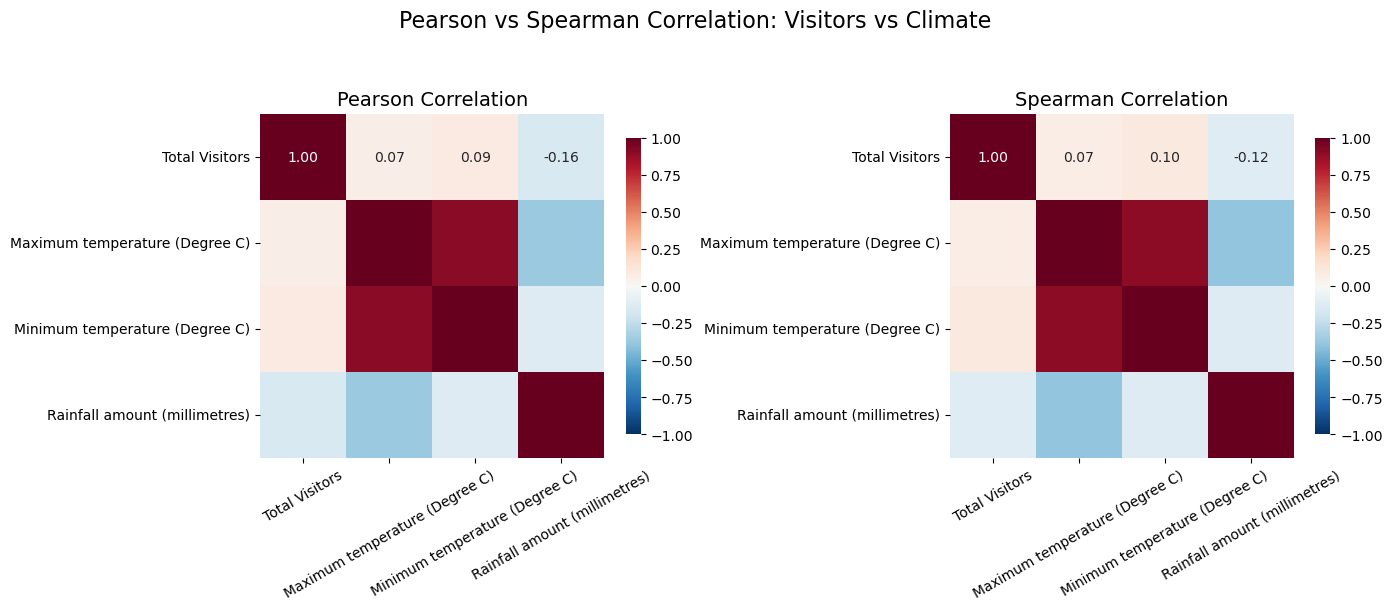

In [12]:
def corr_compare_heatmaps(df, cols, title="Pearson vs Spearman Correlation: Visitors vs Climate"):
    df = df.copy()
    df.rename(columns=lambda s: s.strip(), inplace=True)
    df = df[cols].apply(pd.to_numeric, errors="coerce")

    pearson_corr  = df.corr(method="pearson")
    spearman_corr = df.corr(method="spearman")

    # set the size of the plot
    fig, axes = plt.subplots(1, 2, figsize=(14,6))

    # Color scale is fixed at -1 to 1
    vmin, vmax = -1, 1

    # Pearson
    sns.heatmap(
        pearson_corr, annot=True, fmt=".2f", cmap="RdBu_r",
        vmin=vmin, vmax=vmax, square=True, cbar=True,
        cbar_kws={"shrink":0.7}, ax=axes[0]
    )
    axes[0].set_title("Pearson Correlation", fontsize=14)
    axes[0].tick_params(axis='x', rotation=30)
    axes[0].tick_params(axis='y', rotation=0)
    #Red and blue gradient color, negative correlation is blue, positive correlation is red
    # Spearman
    sns.heatmap(
        spearman_corr, annot=True, fmt=".2f", cmap="RdBu_r",
        vmin=vmin, vmax=vmax, square=True, cbar=True,
        cbar_kws={"shrink":0.7}, ax=axes[1]
    )
    axes[1].set_title("Spearman Correlation", fontsize=14)
    axes[1].tick_params(axis='x', rotation=30)
    axes[1].tick_params(axis='y', rotation=0)

    plt.suptitle(title, fontsize=16, y=1.02)
    plt.tight_layout()
    plt.show()
# apply
cols = [
    "Total Visitors",
    "Maximum temperature (Degree C)",
    "Minimum temperature (Degree C)",
    "Rainfall amount (millimetres)"
]
corr_compare_heatmaps(merged_df, cols)

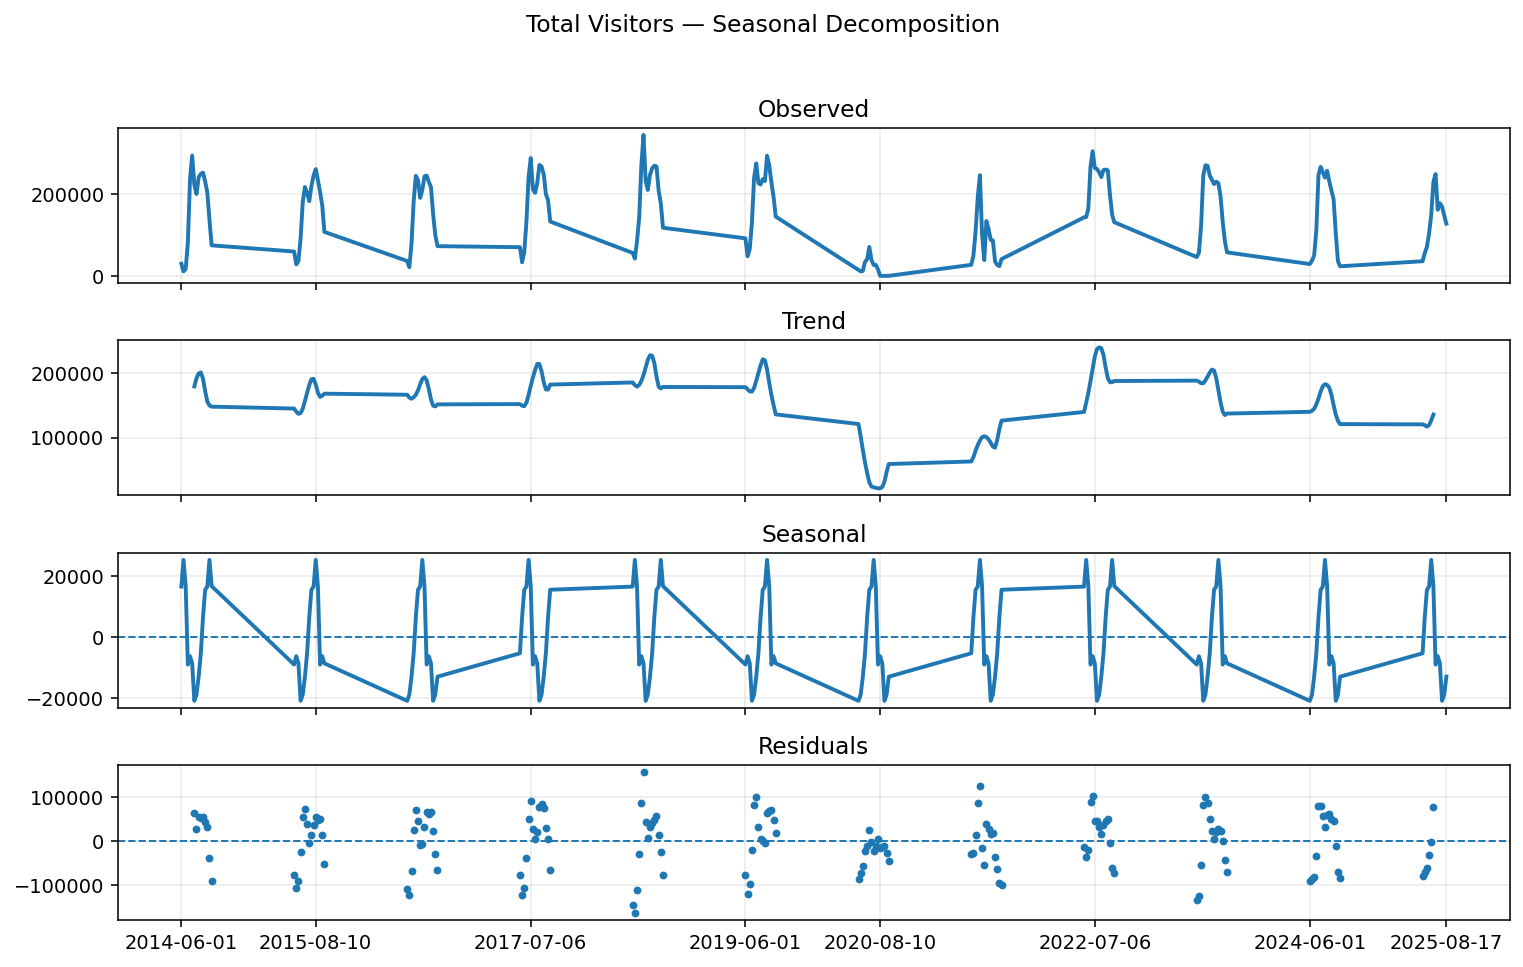

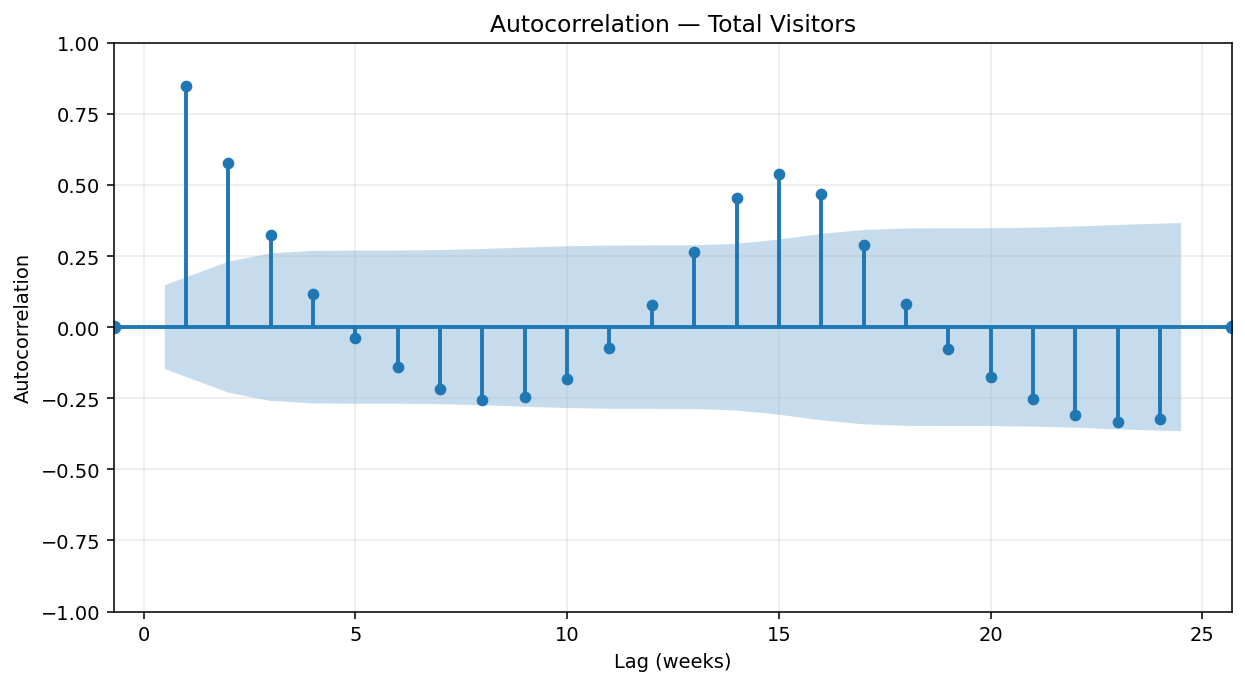

In [13]:
import numpy as np
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.graphics.tsaplots import plot_acf

visitation_df = visitation_df.copy()
visitation_df["Total Visitors"] = visitation_df[RESORT_COLS].sum(axis=1)

# The snow season starts on June 1st every year, and the first to 12th weeks will have 7 days of additional holidays.
visitation_df["SeasonStart"] = pd.to_datetime(visitation_df["Year"].astype(str) + "-06-01")
visitation_df["Date"] = visitation_df["SeasonStart"] + pd.to_timedelta((visitation_df["Week"]-1)*7, unit="D")

ts_visitors = (visitation_df
               .sort_values("Date")
               .set_index("Date")["Total Visitors"]
               .astype(float))

# Seasonal decomposition (period=12 corresponds to a 12-week snow season)
plt.rcParams.update({"figure.dpi":140, "lines.linewidth":2.0})
ts_clean = ts_visitors.dropna()
decomp = seasonal_decompose(ts_clean, model="additive", period=12)

fig, axes = plt.subplots(4, 1, figsize=(11, 7), sharex=True)
fig.suptitle("Total Visitors — Seasonal Decomposition", y=0.98)

axes[0].plot(ts_clean);            axes[0].set_title("Observed");  axes[0].grid(True, alpha=.25)
axes[1].plot(decomp.trend);        axes[1].set_title("Trend");     axes[1].grid(True, alpha=.25)
axes[2].plot(decomp.seasonal);     axes[2].axhline(0, ls="--", lw=1)
axes[2].set_title("Seasonal");     axes[2].grid(True, alpha=.25)
axes[3].plot(decomp.resid, ".");   axes[3].axhline(0, ls="--", lw=1)
axes[3].set_title("Residuals");    axes[3].grid(True, alpha=.25)

tick_locs = np.linspace(0, len(ts_clean)-1, 8, dtype=int)
axes[3].set_xticks(ts_clean.index[tick_locs])
plt.tight_layout(rect=[0,0,1,0.96]); plt.show()

# Autocorrelation ACF (see periodicity/lag) 
fig = plt.figure(figsize=(9,5))
ax = fig.add_subplot(111)
plot_acf(ts_clean, lags=24, alpha=0.05, zero=False, ax=ax, marker='o')
ax.set_title("Autocorrelation — Total Visitors")
ax.set_xlabel("Lag (weeks)"); ax.set_ylabel("Autocorrelation"); ax.grid(True, alpha=.25)
plt.tight_layout(); plt.show()
